我们只有Top500的功率数据，如何用Top500来估计全球？

假设一个国家的整体HPC功率$E_c$与其进入Top500的超算的总功率$P_c$间满足某为止映射关系$\phi(\cdot)$：
\begin{equation}
    \mathcal{E}_c = \phi_c(P_c)
\end{equation}

# 对Top500数据进行分析

In [1]:
import pandas as pd
# energy_mix： 我们手动整理的 2023年的数据，尽管数据来源有所有的数据，但是不提供免费下载的数据/API，所以只能手动抄录
# https://www.conybrown.cn:8000/user/himcm15294/lab/tree/test.ipynb
energy_mix = pd.read_csv('./data/Emission table-工作表1.csv')
energy_types = ['gas', 'coal', 'oil', 'biomass', 'wind', 'solar', 'hydro', 'geothermal', 'nuclear', 'unknown']
# Clean up column names,去掉前后空格
energy_mix.columns = energy_mix.columns.str.strip()

Top500 = pd.read_excel('./data/TOP500_202406.xlsx')
Top500 = Top500[['Name', 'Country', 'Year','Power (kW)']]
# 缺失值补全：用前一个进行填充
# Top500['Power (kW)'].fillna(method='ffill', inplace=True)
Top500['Power (kW)'] = Top500['Power (kW)'].ffill()
Top500.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Name        422 non-null    object 
 1   Country     500 non-null    object 
 2   Year        500 non-null    int64  
 3   Power (kW)  500 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 15.8+ KB


In [8]:
energy_mix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330 entries, 0 to 329
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   year                              330 non-null    int64  
 1   country                           330 non-null    object 
 2   energy type                       330 non-null    object 
 3   type electricity available(TWh)   330 non-null    object 
 4   total electricity available(TWh)  330 non-null    object 
 5   type electricity rate             330 non-null    float64
 6   type emission(Mt)                 330 non-null    float64
 7   total emission(Mt)                330 non-null    float64
 8   type emission rate                330 non-null    float64
 9   Carbon Intensity(gCO_2eq/kWh)     330 non-null    int64  
 10  Unnamed: 10                       0 non-null      float64
dtypes: float64(5), int64(2), object(4)
memory usage: 28.5+ KB


In [9]:
# 先把energy_mix['type electricity available(TWh)']转换成float
energy_mix['type electricity available(TWh)'] = energy_mix['type electricity available(TWh)'].str.replace(',', '').astype(float)
merged_data = energy_mix.groupby('energy type')['type electricity available(TWh)'].sum().reset_index()
merged_data

,energy type,type electricity available(TWh)
0,biomass,145.072000
1,coal,3019.149910
2,gas,2929.281270
3,geothermal,31.073890
4,hydro,1780.578300
5,nuclear,1977.120000
6,oil,49.132635
7,solar,682.790000
8,unknown,1023.584050
9,wind,1142.631180


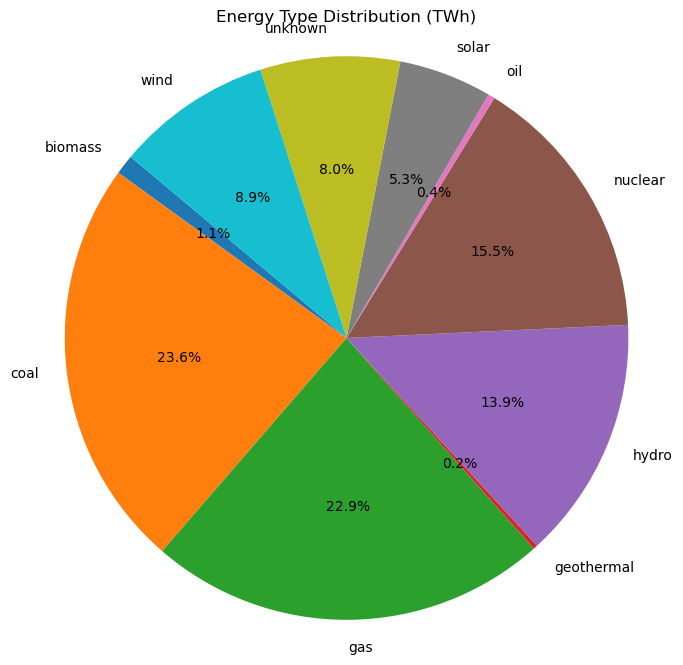

In [11]:


# 绘制饼图
plt.figure(figsize=(8, 8))
plt.pie(merged_data['type electricity available(TWh)'], labels=merged_data['energy type'], autopct='%1.1f%%', startangle=140)
plt.title('Energy Type Distribution (TWh)')
plt.axis('equal')  # 确保饼图是圆形
plt.show()

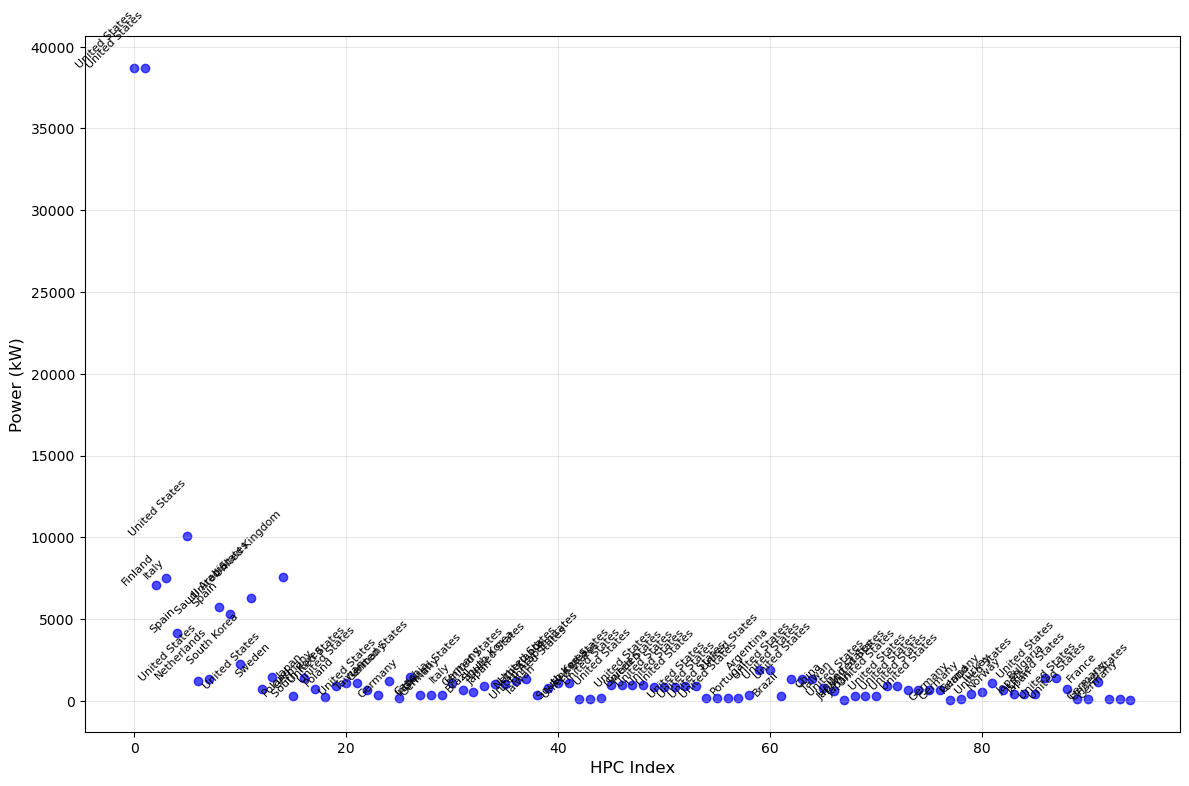

可视化已完成，图像保存为 HPC_Power_Distribution.png！


In [12]:
import matplotlib.pyplot as plt

# 筛选数据
Top500 = Top500[['Name', 'Country', 'Year', 'Power (kW)']]

# 确定年份筛选（如2023年）
year = 2023
filtered_data = Top500[Top500['Year'] == year]

# 绘制散点图
plt.figure(figsize=(12, 8))
plt.scatter(range(len(filtered_data)), filtered_data['Power (kW)'], c='blue', alpha=0.7)

# 添加国家标注
for i, country in enumerate(filtered_data['Country']):
    plt.text(i, filtered_data['Power (kW)'].iloc[i], country, fontsize=8, rotation=45, ha='right')

# 设置标题和轴标签
# plt.title(f"HPC Power Distribution by Country ({year})", fontsize=16)
plt.xlabel("HPC Index", fontsize=12)
plt.ylabel("Power (kW)", fontsize=12)
plt.grid(alpha=0.3)

# 调整布局并保存
plt.tight_layout()
plt.savefig("./output/HPC_Power_Distribution.png")
plt.show()

print("可视化已完成，图像保存为 HPC_Power_Distribution.png！")


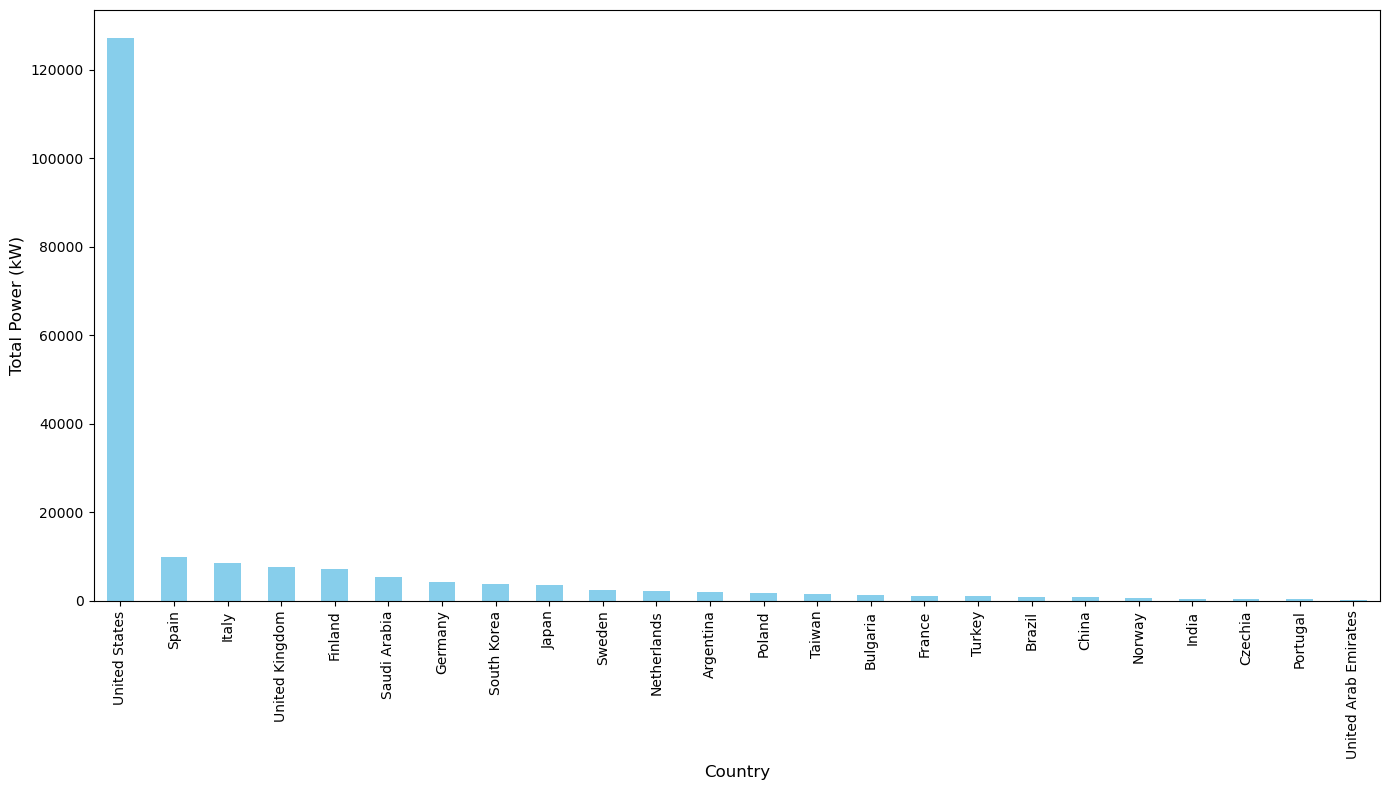

柱状图已完成，图像保存为 HPC_Power_Bar_Chart.png...


In [3]:
import matplotlib.pyplot as plt

# 筛选数据
Top500 = Top500[['Name', 'Country', 'Year', 'Power (kW)']]

# 确定年份筛选（如2023年）
year = 2023
filtered_data = Top500[Top500['Year'] == year]

# 计算每个国家的总功率
country_power = filtered_data.groupby('Country')['Power (kW)'].sum().sort_values(ascending=False)

# 绘制柱状图
plt.figure(figsize=(14, 8))
country_power.plot(kind='bar', color='skyblue')
# plt.title(f"Total HPC Power by Country ({year})", fontsize=16)
plt.xlabel("Country", fontsize=12)
plt.ylabel("Total Power (kW)", fontsize=12)
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig("./output/HPC_Power_Bar_Chart.png")
plt.show()

print("柱状图已完成，图像保存为 HPC_Power_Bar_Chart.png...")


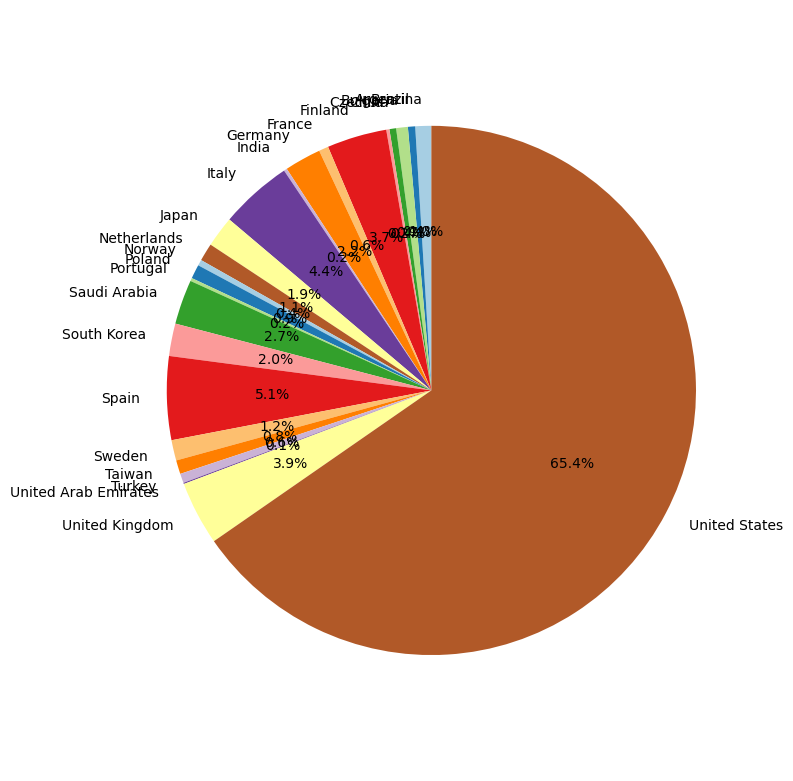

饼图已完成，图像保存为 HPC_Power_Pie_Chart.png...


In [4]:
import matplotlib.pyplot as plt

# 筛选数据
Top500 = Top500[['Name', 'Country', 'Year', 'Power (kW)']]

# 确定年份筛选（如2023年）
year = 2023
filtered_data = Top500[Top500['Year'] == year]

# 计算每个国家的总功率
country_power = filtered_data.groupby('Country')['Power (kW)'].sum()

# 绘制饼图
plt.figure(figsize=(8, 8))
plt.pie(country_power, labels=country_power.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
# plt.title(f"Power Distribution by Country ({year})", fontsize=16)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.savefig("./output/HPC_Power_Pie_Chart.png")
plt.show()

print("饼图已完成，图像保存为 HPC_Power_Pie_Chart.png...")


In [13]:
# 保存结果的列表
results = []

for year in {2023}:
    total_emission_gas = 0
    total_emission = {etype: 0 for etype in energy_types}
    missing_country = []
    
    for i in range(Top500.shape[0]):
        country = Top500.iloc[i]['Country']
        # if country != "France":
            # continue
        power = Top500.iloc[i]['Power (kW)']
        
        for etype in energy_types:
            # Filter the energy_mix DataFrame and retrieve values
            filtered_data = energy_mix[(energy_mix['country'] == country) & 
                                       (energy_mix['energy type'] == etype) & 
                                       (energy_mix['year'] == year)]
            
            gas_index = filtered_data['Carbon Intensity(gCO_2eq/kWh)'].values
            type_electricity_rate = filtered_data['type electricity rate'].values
            
            # Check if gas_index and type_electricity_rate are not empty
            if len(gas_index) > 0 and len(type_electricity_rate) > 0:
                gas_index = gas_index[0]
                type_electricity_rate = type_electricity_rate[0]
                carbon_emission = power *365*24* type_electricity_rate * gas_index
                total_emission[etype] += carbon_emission
            else:
                if country not in missing_country:
                    missing_country.append(country)

    # 统计总排放
    print("总排放统计:")
    FR_carbon_emission = 0
    for etype, total in total_emission.items():
        FR_carbon_emission += total
        print(f"{etype}: {total / 1000} kgCO_2eq")
        # 将结果保存到列表中
        results.append({
            "Year": year,
            "Energy Type": etype,
            "Carbon Emission (kgCO_2eq)": total / 1000
        })
    
    # 添加总排放到结果中
    print(f"{year}: HPC_Top500_carbon_emission: {FR_carbon_emission / 1000000} t CO_2eq")
    results.append({
        "Year": year,
        "Energy Type": "Total",
        "Carbon Emission (kgCO_2eq)": FR_carbon_emission / 1000
    })

    print(f"missing countries: {missing_country}")

# 将结果保存为CSV
results_df = pd.DataFrame(results)
results_df.to_csv("./output/HPC_Top500_Carbon_Emissions.csv", index=False)

print("计算结果已保存到 HPC_Top500_Carbon_Emissions.csv 文件中！")

总排放统计:
gas: 96830080174.90843 kgCO_2eq
coal: 98267663711.87265 kgCO_2eq
oil: 1825799537.605074 kgCO_2eq
biomass: 1941272502.8777523 kgCO_2eq
wind: 741831693.3760664 kgCO_2eq
solar: 947792890.0095667 kgCO_2eq
hydro: 963501062.3087326 kgCO_2eq
geothermal: 92817050.16847205 kgCO_2eq
nuclear: 1012895665.4565294 kgCO_2eq
unknown: 10289274873.398752 kgCO_2eq
2023: HPC_Top500_carbon_emission: 212912929.161982 t CO_2eq
missing countries: ['China', 'Saudi Arabia', 'Thailand', 'Canada', 'Morocco']
计算结果已保存到 HPC_Top500_Carbon_Emissions.csv 文件中！


In [10]:
23886.238964901768 /(37.4*10**9)

6.386694910401542e-07

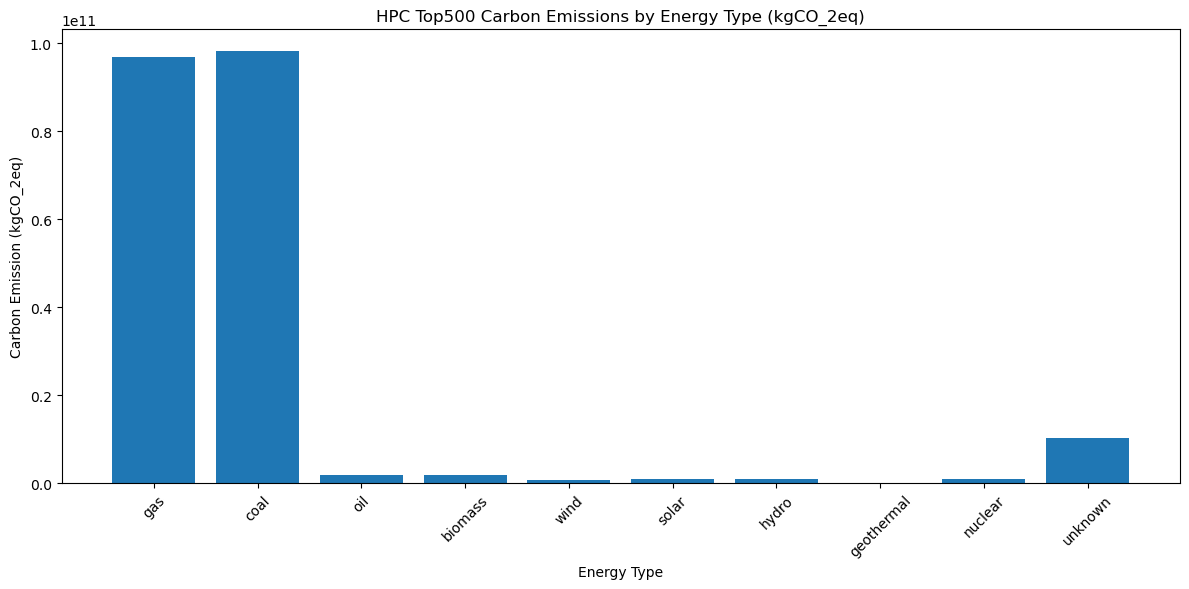

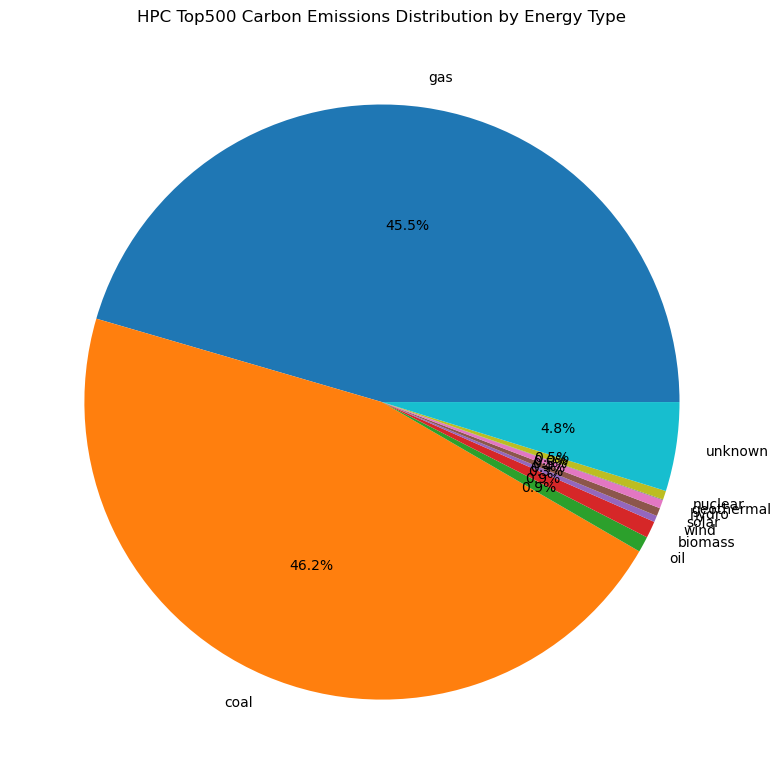

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# 加载计算结果
results_df = pd.read_csv("./output/HPC_Top500_Carbon_Emissions.csv")

# 筛选数据排除总排放以外的能源类型
energy_emissions = results_df[results_df["Energy Type"] != "Total"]

# 筛选总排放数据
total_emissions = results_df[results_df["Energy Type"] == "Total"]

# 绘制柱状图
plt.figure(figsize=(12, 6))
plt.bar(energy_emissions["Energy Type"], energy_emissions["Carbon Emission (kgCO_2eq)"])
plt.title("HPC Top500 Carbon Emissions by Energy Type (kgCO_2eq)")
plt.xlabel("Energy Type")
plt.ylabel("Carbon Emission (kgCO_2eq)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("./output/bar_chart_carbon_emissions.png")
plt.show()

# 绘制饼图
plt.figure(figsize=(8, 8))
plt.pie(energy_emissions["Carbon Emission (kgCO_2eq)"], labels=energy_emissions["Energy Type"], autopct='%1.1f%%')
plt.title("HPC Top500 Carbon Emissions Distribution by Energy Type")
plt.tight_layout()
plt.savefig("./output/pie_chart_carbon_emissions.png")
plt.show()


In [15]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np

# Define the neural network model
class PhiModel(nn.Module):
    def __init__(self, input_dim, hidden_dim=64):
        super(PhiModel, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, hidden_dim)
        self.fc3 = nn.Linear(hidden_dim, 1)  # Output is a single value (the predicted HPC power)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Create a synthetic dataset for demonstration
# Example: 5 countries, each with input features: Top500 power, computing power, total generation, etc.
# Input features: Top500 Power, Computing Power, Total Generation, Energy Structure
X = np.random.rand(5, 4)  # 5 countries, 4 input features
y = np.random.rand(5, 1)  # The actual HPC power (to be predicted)

# Convert to PyTorch tensors
X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32)

# Initialize the model, loss function, and optimizer
model = PhiModel(input_dim=X.shape[1])
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Hyperparameters for the regularization terms
lambda_1 = 1e-3  # Loss weight for power constraint
lambda_2 = 1e-2  # Loss weight for similarity constraint

# Training loop
epochs = 1000
for epoch in range(epochs):
    model.train()

    # Forward pass
    y_pred = model(X_tensor)

    # Compute the losses
    mse_loss = criterion(y_pred, y_tensor)
    constraint_loss = torch.sum(torch.relu(y_pred - 0.1 * X_tensor[:, 2].unsqueeze(1)))  # Ensure HPC power <= 10% of generation
    similarity_loss = torch.sum(torch.abs(y_pred - y_pred.mean()))  # Enforce similarity across countries

    # Total loss
    loss = mse_loss + lambda_1 * constraint_loss + lambda_2 * similarity_loss

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 100 == 0:
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}")

# After training, the model can predict the HPC power for each country
model.eval()
with torch.no_grad():
    predictions = model(X_tensor)
    print("Predicted HPC powers:", predictions.numpy())


Epoch [100/1000], Loss: 0.0176
Epoch [200/1000], Loss: 0.0114
Epoch [300/1000], Loss: 0.0114
Epoch [400/1000], Loss: 0.0114
Epoch [500/1000], Loss: 0.0114
Epoch [600/1000], Loss: 0.0114
Epoch [700/1000], Loss: 0.0114
Epoch [800/1000], Loss: 0.0114
Epoch [900/1000], Loss: 0.0114
Epoch [1000/1000], Loss: 0.0114
Predicted HPC powers: [[0.8247636 ]
 [0.41903162]
 [0.6011307 ]
 [0.86148804]
 [0.5482191 ]]


# 估计总体

In [16]:
import pandas as pd

# 读取能源数据
energy_mix = pd.read_csv('./data/Emission table-工作表1.csv')

# 清理列名：去掉前后空格
energy_mix.columns = energy_mix.columns.str.strip()

# 确保数值列是数值类型，如果不是，进行转换
energy_mix['type electricity available(TWh)'] = pd.to_numeric(energy_mix['type electricity available(TWh)'], errors='coerce')
energy_mix['total electricity available(TWh)'] = pd.to_numeric(energy_mix['total electricity available(TWh)'], errors='coerce')

# 检查缺失值并填补，选择用前向填充方法（也可以根据实际情况选择其他方法）
energy_mix['type electricity available(TWh)'].fillna(method='ffill', inplace=True)
energy_mix['total electricity available(TWh)'].fillna(method='ffill', inplace=True)

# 计算每种能源类型的比例（以总电力为基准）
energy_mix['energy_ratio'] = energy_mix['type electricity available(TWh)'] / energy_mix['total electricity available(TWh)']

# 展示处理后的数据
print(energy_mix[['country', 'energy type', 'energy_ratio']].head())

# 如果需要合并到Top500数据中，可以通过国家列合并
Top500 = pd.read_excel('./data/TOP500_202406.xlsx')
Top500 = Top500[['Name', 'Country', 'Year', 'Power (kW)']]

# 清理Top500数据
Top500['Power (kW)'] = Top500['Power (kW)'].ffill()  # 填充缺失值
print(Top500.head())

# 假设Top500数据与energy_mix数据通过"Country"列合并
merged_data = pd.merge(Top500, energy_mix[['country', 'energy type', 'energy_ratio']], left_on='Country', right_on='country', how='left')

# 展示合并后的数据
print(merged_data.head())


  country energy type  energy_ratio
0  France         gas           NaN
1  France     biomass      0.012275
2  France         oil      0.003313
3  France        coal      0.001727
4  France        wind      0.095609


/tmp/ipykernel_813259/5386866.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  energy_mix['type electricity available(TWh)'].fillna(method='ffill', inplace=True)
/tmp/ipykernel_813259/5386866.py:14: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  energy_mix['type electricity available(TWh)'].fillna(method='ffill', inplace=True)
/tmp/ipykernel_813259/5386866.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Ser

                   Name        Country  Year  Power (kW)
0              Frontier  United States  2021    22786.00
1                Aurora  United States  2023    38698.36
2                 Eagle  United States  2023    38698.36
3  Supercomputer Fugaku          Japan  2020    29899.23
4                  LUMI        Finland  2023     7106.82
       Name        Country  Year  Power (kW)        country energy type  \
0  Frontier  United States  2021     22786.0  United States         gas   
1  Frontier  United States  2021     22786.0  United States     biomass   
2  Frontier  United States  2021     22786.0  United States         oil   
3  Frontier  United States  2021     22786.0  United States        coal   
4  Frontier  United States  2021     22786.0  United States        wind   

   energy_ratio  
0      0.405941  
1      0.002223  
2      0.000906  
3      0.169554  
4      0.104950  


In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

2024-11-18 17:05:14.144502: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1731949514.209792   15170 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1731949514.229731   15170 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-18 17:05:14.366292: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# 读取能源数据
energy_mix = pd.read_csv('./data/Emission table-工作表1.csv')

# 清理列名：去掉前后空格
energy_mix.columns = energy_mix.columns.str.strip()

# 检查energy_mix的列名，确认是否有'Country'列
print(energy_mix.columns)

Index(['year', 'country', 'energy type', 'type electricity available(TWh)',
       'total electricity available(TWh)', 'type electricity rate',
       'type emission(Mt)', 'total emission(Mt)', 'type emission rate',
       'Carbon Intensity(gCO_2eq/kWh)', 'Unnamed: 10'],
      dtype='object')


In [3]:
# 如果没有'Country'列，可能需要重命名
energy_mix.rename(columns={'country': 'Country'}, inplace=True)
energy_mix.rename(columns={'year': 'Year'}, inplace=True)

# 读取Top500超算数据
Top500 = pd.read_excel('./data/TOP500_202406.xlsx')

# 清理列名：去掉前后空格
Top500.columns = Top500.columns.str.strip()

# 检查Top500的列名，确认是否有'Country'列
print(Top500.columns)

# 如果没有'Country'列，可能需要重命名
# Top500.rename(columns={'name_of_column_in_Top500': 'Country'}, inplace=True)

# 将每个国家的超算功率按年和国家分组，并计算每年每国Top500超算的总功率
top500_total_power = Top500.groupby(['Country', 'Year'])['Power (kW)'].sum().reset_index()

# 合并能源数据与Top500数据
merged_data = pd.merge(energy_mix, top500_total_power, on='Country', how='inner')

# 检查合并后的数据框结构
print(merged_data.head())


Index(['Rank', 'Previous Rank', 'First Appearance', 'First Rank', 'Name',
       'Computer', 'Site', 'Manufacturer', 'Country', 'Year', 'Segment',
       'Total Cores', 'Accelerator/Co-Processor Cores', 'Rmax [TFlop/s]',
       'Rpeak [TFlop/s]', 'Nmax', 'Nhalf', 'HPCG [TFlop/s]', 'Power (kW)',
       'Power Source', 'Energy Efficiency [GFlops/Watts]', 'Memory',
       'Architecture', 'Processor', 'Processor Technology',
       'Processor Speed (MHz)', 'Operating System', 'OS Family',
       'Accelerator/Co-Processor', 'Cores per Socket', 'Processor Generation',
       'System Model', 'System Family', 'Interconnect Family', 'Interconnect',
       'Continent', 'Site ID', 'System ID'],
      dtype='object')
   Year_x Country energy type type electricity available(TWh)  \
0    2023  France         gas                              28   
1    2023  France         gas                              28   
2    2023  France         gas                              28   
3    2023  France        

In [18]:
import pandas as pd
import numpy as np
import torch
from torch import nn
from torch.utils.data import DataLoader, Dataset
from torch.optim import Adam

# 数据加载
energy_mix = pd.read_csv('./data/Emission table-工作表1.csv')
Top500 = pd.read_excel('./data/TOP500_202406.xlsx')

# 数据预处理
energy_mix.rename(columns=lambda x: x.strip().lower(), inplace=True)
Top500.rename(columns=lambda x: x.strip().lower(), inplace=True)
Top500['power (kw)'] = Top500['power (kw)'].ffill()

# 转换功率单位：kW -> MW
Top500['power (MW)'] = Top500['power (kw)'] * 0.001

# 分组统计Top500数据
Top500_grouped = Top500.groupby("country", as_index=False).agg({
    "power (MW)": "sum",
    "name": "count"
})
Top500_grouped.rename(columns={"name": "supercomputer count", "power (MW)": "total power (mw)"}, inplace=True)

# 按国家整合energy_mix数据
def aggregate_emissions_by_country(energy_mix):
    """将energy_mix中不同能源类型的排放量按国家加总，返回国家总排放量"""
    grouped_emissions = energy_mix.groupby("country").apply(
        lambda group: (group['type electricity rate'] * group['type emission(mt)']).sum()
    )
    grouped_emissions.name = 'total emissions (mt)'
    return grouped_emissions.reset_index()

# 整合数据
country_emissions = aggregate_emissions_by_country(energy_mix)
merged_data = pd.merge(Top500_grouped, country_emissions, on='country', how='inner')

# 定义国家特定数据集
class HPCDataset(Dataset):
    def __init__(self, power_data, emission_data):
        self.power = torch.tensor(power_data, dtype=torch.float32).unsqueeze(1)
        self.emissions = torch.tensor(emission_data, dtype=torch.float32).unsqueeze(1)

    def __len__(self):
        return len(self.power)

    def __getitem__(self, idx):
        return self.power[idx], self.emissions[idx]

# 定义两层神经网络
class TwoLayerNN(nn.Module):
    def __init__(self):
        super(TwoLayerNN, self).__init__()
        self.fc1 = nn.Linear(1, 64)
        self.fc2 = nn.Linear(64, 1)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# 创建每个国家的模型和训练过程
def train_country_model(country_data):
    power = country_data['total power (mw)'].values
    emissions = country_data['total emissions (mt)'].values

    # 数据集
    dataset = HPCDataset(power, emissions)
    dataloader = DataLoader(dataset, batch_size=8, shuffle=True)

    # 模型、损失函数、优化器
    model = TwoLayerNN()
    criterion = nn.MSELoss()
    optimizer = Adam(model.parameters(), lr=0.01)

    # 训练模型
    epochs = 500
    for epoch in range(epochs):
        for batch_power, batch_emissions in dataloader:
            optimizer.zero_grad()
            predictions = model(batch_power)
            loss = criterion(predictions, batch_emissions)
            loss.backward()
            optimizer.step()

    return model

# 模型训练和结果计算
country_models = {}
szy_values = []
for country, country_data in merged_data.groupby('country'):
    print(f"Training model for {country}...")
    model = train_country_model(country_data)
    country_models[country] = model

    # 计算 S_{zy,c}
    total_power = country_data['total power (mw)'].values
    predicted_emissions = model(torch.tensor(total_power, dtype=torch.float32).unsqueeze(1)).detach().numpy()
    szy = np.mean(predicted_emissions / total_power)
    szy_values.append({"country": country, "S_zy": szy})

# 保存 S_{zy} 数据到 CSV
szy_df = pd.DataFrame(szy_values)
szy_df.to_csv("country_szy_values.csv", index=False)

# 打印方差
szy_variance = np.var(szy_df["S_zy"])
print(f"Variance of S_zy: {szy_variance:.4e}")

# 全局碳排放计算
total_emissions = 0
for country, model in country_models.items():
    total_power = merged_data[merged_data['country'] == country]['total power (mw)'].values
    emissions = model(torch.tensor(total_power, dtype=torch.float32).unsqueeze(1)).detach().numpy()
    total_emissions += np.sum(emissions)

# 单位换算为 Mt CO2
total_emissions_mt = total_emissions
print(f"Estimated Global HPC Carbon Emissions: {total_emissions_mt:.2f} Mt CO2")


/tmp/ipykernel_15170/188653019.py:30: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  grouped_emissions = energy_mix.groupby("country").apply(


Training model for Argentina...
Training model for Australia...
Training model for Austria...
Training model for Belgium...
Training model for Brazil...
Training model for Bulgaria...
Training model for Czechia...
Training model for Finland...
Training model for France...
Training model for Germany...
Training model for Hungary...
Training model for Iceland...
Training model for India...
Training model for Ireland...
Training model for Italy...
Training model for Japan...
Training model for Luxembourg...
Training model for Netherlands...
Training model for Norway...
Training model for Poland...
Training model for Portugal...
Training model for Russia...
Training model for Singapore...
Training model for Slovenia...
Training model for South Korea...
Training model for Spain...
Training model for Sweden...
Training model for Switzerland...
Training model for Taiwan...
Training model for Turkey...
Training model for United Arab Emirates...
Training model for United Kingdom...
Training mod

In [12]:
szy = pd.read_csv('./country_szy_values.csv')
szy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   country  33 non-null     object 
 1   S_zy     33 non-null     float64
dtypes: float64(1), object(1)
memory usage: 660.0+ bytes


<class 'pandas.core.frame.DataFrame'>
Index: 33 entries, 12 to 16
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   country  33 non-null     object 
 1   S_zy     33 non-null     float64
dtypes: float64(1), object(1)
memory usage: 792.0+ bytes


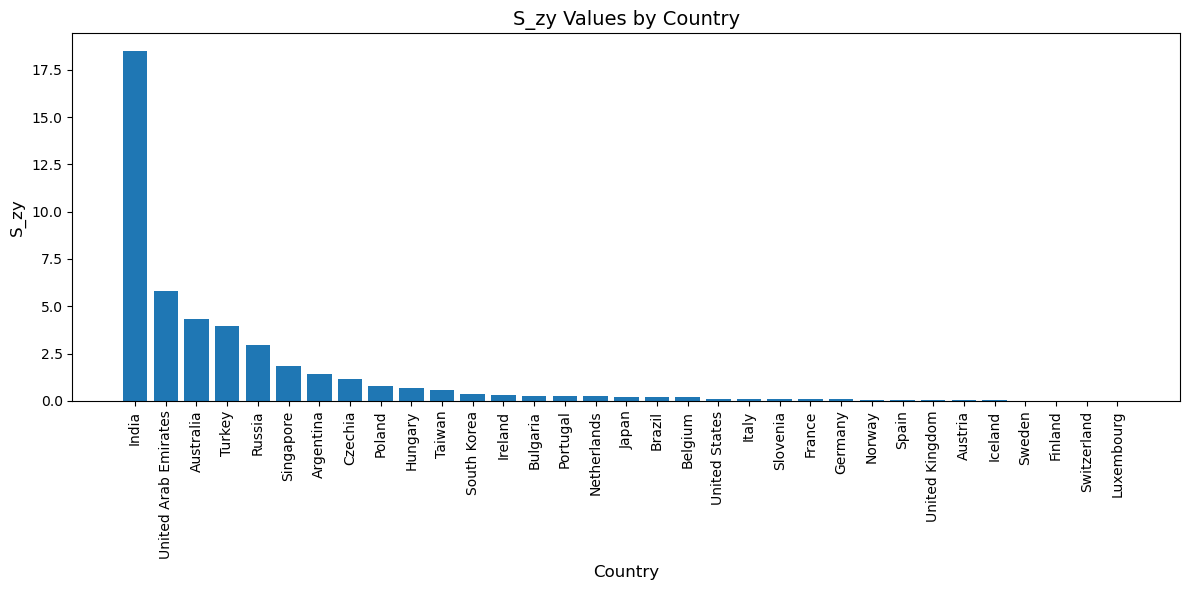

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# 加载 country_szy_values.csv 数据
szy = pd.read_csv('./country_szy_values.csv')
szy.sort_values('S_zy', ascending=False, inplace=True)

# 打印数据信息
szy.info()

# 可视化 S_zy 的分布情况
plt.figure(figsize=(12, 6))
plt.bar(szy['country'], szy['S_zy'])
plt.xlabel('Country', fontsize=12)
plt.ylabel('S_zy', fontsize=12)
plt.title('S_zy Values by Country', fontsize=14)
plt.xticks(rotation=90, fontsize=10)
plt.tight_layout()
plt.show()


In [ ]:
#
kappa = 0.015  # 全球功率限制比例，对应公式 (14)
lambda_ = 0.01  # 全球碳排放限制比例，对应公式 (15)
total_global_power = 3e5  # 全球总功率消耗 (单位 TWh)，公式 (14)
total_global_emission = 3.3e4  # 全球总碳排放量 (单位 Mt CO2)，公式 (15)
alpha_1, alpha_2 = 1.0, 1.0  # 约束惩罚项权重，公式 (17)

# 导入必要的库
import torch
import torch.nn as nn
import torch.optim as optim

# 数据准备（示例数据，需根据具体情况调整）
n_countries = 10  # 国家数量
P_top500 = torch.rand(n_countries, 1) * 10  # Top500 功率数据 (单位 GW)
w_c_v = torch.rand(n_countries, 3)  # 各国能源类型占比 (煤、风、核)
generated_power_v = torch.rand(n_countries, 3) * 100  # 各能源类型发电能力 (单位 GW)
total_generated_power = torch.rand(n_countries, 1) * 300  # 各国总发电能力 (单位 GW)
carbon_intensity_v = torch.rand(n_countries, 3) * 0.5  # 各能源类型碳强度 (单位 kgCO2/kWh)

# 神经网络模型定义，对应公式 (10)
class PhiNetwork(nn.Module):
    def __init__(self, input_dim=1, hidden_dim=32):
        super(PhiNetwork, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, 1)
        self.relu = nn.ReLU()

    def forward(self, x):
        h = self.relu(self.fc1(x))  # 第一层输出，公式 (11)
        y = self.fc2(h)  # 第二层输出，公式 (12)
        return y

# 初始化模型和优化器
phi_net = PhiNetwork()
optimizer = optim.Adam(phi_net.parameters(), lr=0.001)

# 损失函数定义，包括目标函数和约束惩罚项
def loss_function(P_top500, w_c_v, generated_power_v, total_generated_power,
                  total_global_power, total_global_emission, carbon_intensity_v, alpha_1, alpha_2):
    # 前向传播，计算 phi(P_c^Top500)
    phi = phi_net(P_top500)
    
    # 计算 S_{zy,c} 和方差目标，公式 (3)
    S_zy_c = phi / P_top500
    S_zy_mean = S_zy_c.mean()
    variance_loss = ((S_zy_c - S_zy_mean) ** 2).mean()

    # 能源类型约束惩罚，公式 (6)
    energy_constraint_loss = torch.relu((w_c_v * phi).sum(dim=1) - generated_power_v.sum(dim=1)).mean()

    # 总发电能力约束惩罚，公式 (7)
    total_power_constraint_loss = torch.relu(phi - total_generated_power).mean()

    # 全球功率限制约束惩罚，公式 (8)
    global_power_loss = torch.relu(phi.sum() - kappa * total_global_power)

    # 碳排放限制约束惩罚，公式 (9)
    carbon_emission = (w_c_v * phi.unsqueeze(-1) * carbon_intensity_v).sum()
    global_emission_loss = torch.relu(carbon_emission - lambda_ * total_global_emission)

    # 综合损失函数，公式 (17)
    total_loss = variance_loss + alpha_1 * (energy_constraint_loss + total_power_constraint_loss) \
                 + alpha_2 * (global_power_loss + global_emission_loss)

    return total_loss

# 训练循环
for epoch in range(1000):  # 设置训练轮数
    optimizer.zero_grad()  # 梯度清零
    loss = loss_function(P_top500, w_c_v, generated_power_v, total_generated_power,
                         total_global_power, total_global_emission, carbon_intensity_v, alpha_1, alpha_2)
    loss.backward()  # 反向传播计算梯度
    optimizer.step()  # 更新模型参数

    if (epoch + 1) % 100 == 0:
        print(f"Epoch [{epoch + 1}/1000], Loss: {loss.item():.4f}")

# 训练完成后查看预测结果
predicted_phi = phi_net(P_top500)
print("Predicted phi values:", predicted_phi)


Epoch [100/1000], Loss: 0.0001
Epoch [200/1000], Loss: 0.0000
Epoch [300/1000], Loss: 0.0000
Epoch [400/1000], Loss: 0.0000
Epoch [500/1000], Loss: 0.0000
Epoch [600/1000], Loss: 0.0000
Epoch [700/1000], Loss: 0.0000
Epoch [800/1000], Loss: 0.0000
Epoch [900/1000], Loss: 0.0000
Epoch [1000/1000], Loss: 0.0000
Predicted phi values: tensor([[0.9496],
        [0.5158],
        [0.7330],
        [0.6283],
        [0.2557],
        [0.3025],
        [1.0610],
        [0.1642],
        [0.8378],
        [0.8245]], grad_fn=<AddmmBackward0>)


In [22]:
energy_mix.head()

,country,energy type,year,Carbon Intensity(gCO_2eq/kWh),type electricity rate
0,USA,Coal,2023,500,0.6
1,China,Gas,2023,400,0.2
2,Germany,Nuclear,2023,350,0.4
3,France,Wind,2023,50,0.3
4,India,Solar,2023,300,0.1


In [21]:
# 示例输入数据
phi_initial = [1.0, 2.0, 1.5, 2.5, 1.8]  # 初始 phi_c(P_c)
power_values = [1.0, 2.1, 1.4, 2.4, 1.7]  # 实际 P_c
energy_availability = [
    {"Coal": 50, "Gas": 30, "Solar": 20},
    {"Coal": 100, "Gas": 60, "Solar": 40},
    {"Coal": 70, "Gas": 50, "Solar": 30},
    {"Coal": 80, "Gas": 40, "Solar": 20},
    {"Coal": 60, "Gas": 30, "Solar": 15},
]  # 每个国家的能源最大供应能力
energy_weights = [
    {"Coal": 0.6, "Gas": 0.3, "Solar": 0.1},
    {"Coal": 0.5, "Gas": 0.4, "Solar": 0.1},
    {"Coal": 0.7, "Gas": 0.2, "Solar": 0.1},
    {"Coal": 0.4, "Gas": 0.5, "Solar": 0.1},
    {"Coal": 0.5, "Gas": 0.4, "Solar": 0.1},
]  # 每个国家的能源分布权重
total_power_availability = [150, 200, 180, 190, 160]  # 各国家总发电能力
global_power = 1000  # 全球总发电能力
global_emission_limit = 5000  # 全球总碳排放限制

# 求解优化问题
optimal_phi = solve_optimization_problem(
    phi_initial,
    power_values,
    energy_availability,
    energy_weights,
    total_power_availability,
    global_power,
    global_emission_limit
)

print("优化后的 phi 值:", optimal_phi)


优化后的 phi 值: [1.02122329 2.14457074 1.42971359 2.45093499 1.73607935]


In [20]:
import pandas as pd
import torch

# 假设能源类型和初始数据（需要根据实际数据填写）
energy_types = ["Coal", "Gas", "Nuclear", "Wind", "Solar", "Hydro"]
Top500 = pd.DataFrame({
    "Country": ["USA", "China", "Germany", "France", "India"],
    "Power (kW)": [100000, 200000, 50000, 40000, 30000]
})
energy_mix = pd.DataFrame({
    "country": ["USA", "China", "Germany", "France", "India"] * len(energy_types),
    "energy type": energy_types * 5,
    "year": [2023] * len(energy_types) * 5,
    "Carbon Intensity(gCO_2eq/kWh)": [500, 400, 350, 50, 300] * len(energy_types),
    "type electricity rate": [0.6, 0.2, 0.4, 0.3, 0.1] * len(energy_types)
})

# 使用训练好的神经网络 (phi_net)
phi_net.eval()  # 设置为评估模式

# 保存结果的列表
results = []

for year in [2023]:
    total_emission = {etype: 0 for etype in energy_types}
    missing_country = []

    for i in range(Top500.shape[0]):
        country = Top500.iloc[i]['Country']
        power = Top500.iloc[i]['Power (kW)']

        # 使用训练好的神经网络计算 phi(power)，单位从 kW 转为 GW
        power_tensor = torch.tensor([[power / 1e6]])  # 转换为 GW 并加上维度
        phi_power = phi_net(power_tensor).item()  # 使用神经网络预测 phi(power)

        for etype in energy_types:
            # 筛选能源类型数据
            filtered_data = energy_mix[
                (energy_mix['country'] == country) & 
                (energy_mix['energy type'] == etype) & 
                (energy_mix['year'] == year)
            ]
            
            gas_index = filtered_data['Carbon Intensity(gCO_2eq/kWh)'].values
            type_electricity_rate = filtered_data['type electricity rate'].values
            
            # 检查数据是否存在
            if len(gas_index) > 0 and len(type_electricity_rate) > 0:
                gas_index = gas_index[0]
                type_electricity_rate = type_electricity_rate[0]
                # 使用 phi(power) 计算碳排放
                carbon_emission = phi_power * 365 * 24 * type_electricity_rate * gas_index
                total_emission[etype] += carbon_emission
            else:
                if country not in missing_country:
                    missing_country.append(country)

    # 统计总排放
    total_carbon_emission = sum(total_emission.values())
    print(f"{year}: 全球总碳排放量 (t CO_2eq): {total_carbon_emission / 1e6}")
    print("各能源分量碳排放量 (t CO_2eq):")
    for etype, total in total_emission.items():
        print(f"  {etype}: {total / 1e6} t CO_2eq")
        results.append({
            "Year": year,
            "Energy Type": etype,
            "Carbon Emission (kgCO_2eq)": total / 1000  # 转换为 kgCO2eq
        })

    # 保存总碳排放量
    results.append({
        "Year": year,
        "Energy Type": "Total",
        "Carbon Emission (kgCO_2eq)": total_carbon_emission / 1000
    })

    print(f"缺失数据的国家: {missing_country}")

# 将结果保存为 CSV 文件
results_df = pd.DataFrame(results)
results_df.to_csv("./output/HPC_Top500_Carbon_Emissions.csv", index=False)

print("计算结果已保存到 HPC_Top500_Carbon_Emissions.csv 文件中！")


RuntimeError: mat1 and mat2 must have the same dtype, but got Double and Float

In [16]:
def compute_szy(phi_values, power_values):
    """
    计算 S_zy 指数。
    :param phi_values: 各国家预测的总功率列表 (phi_c(P_c))
    :param power_values: 各国家实际的总功率列表 (P_c)
    :return: 各国家 S_zy 指数
    """
    return [phi / power if power > 0 else 0 for phi, power in zip(phi_values, power_values)]

def check_energy_type_constraint(phi_values, energy_availability, energy_weights):
    """
    验证每个国家每种能源的约束。
    :param phi_values: 各国家预测的总功率列表 (phi_c(P_c))
    :param energy_availability: 每种能源的最大发电能力 (list of dicts)
    :param energy_weights: 每种能源占比权重 (list of dicts)
    :return: 是否满足约束的布尔值
    """
    for phi, energy_max, weights in zip(phi_values, energy_availability, energy_weights):
        for energy_type, max_capacity in energy_max.items():
            if weights[energy_type] * phi > max_capacity:
                return False
    return True
def check_total_power_constraint(phi_values, total_power_availability):
    """
    验证总发电量约束。
    :param phi_values: 各国家预测的总功率列表 (phi_c(P_c))
    :param total_power_availability: 各国家总发电能力
    :return: 是否满足约束的布尔值
    """
    return all(phi <= total_power for phi, total_power in zip(phi_values, total_power_availability))
def check_global_power_constraint(phi_values, global_power, kappa=0.015):
    """
    验证全球总功率约束。
    :param phi_values: 各国家预测的总功率列表 (phi_c(P_c))
    :param global_power: 全球总发电能力
    :param kappa: 约束比例
    :return: 是否满足约束的布尔值
    """
    return sum(phi_values) <= kappa * global_power
def check_global_emission_constraint(emission_values, global_emission_limit, lambda_=0.01):
    """
    验证全球碳排放约束。
    :param emission_values: 各国家的碳排放量
    :param global_emission_limit: 全球总碳排放量限制
    :param lambda_: 约束比例
    :return: 是否满足约束的布尔值
    """
    return sum(emission_values) <= lambda_ * global_emission_limit
import numpy as np

def optimize_phi(phi_values, power_values):
    """
    优化 phi 以最小化 S_zy 的方差。
    :param phi_values: 各国家预测的总功率列表 (初始值)
    :param power_values: 各国家实际的总功率列表
    :return: 最优 phi 值列表
    """
    def loss_function(phi):
        # 计算 S_zy 和方差
        szy = compute_szy(phi, power_values)
        return np.var(szy)

    # 优化器：假设用 scipy 的优化方法
    from scipy.optimize import minimize
    result = minimize(loss_function, phi_values, method='L-BFGS-B')
    return result.x
def solve_optimization_problem(phi_initial, power_values, energy_availability, energy_weights, 
                               total_power_availability, global_power, global_emission_limit):
    """
    综合求解优化问题。
    """
    # 优化过程
    phi_optimal = optimize_phi(phi_initial, power_values)

    # 检查每个约束
    energy_constraint = check_energy_type_constraint(phi_optimal, energy_availability, energy_weights)
    total_power_constraint = check_total_power_constraint(phi_optimal, total_power_availability)
    global_power_constraint = check_global_power_constraint(phi_optimal, global_power)
    emission_constraint = check_global_emission_constraint(phi_optimal, global_emission_limit)

    # 打印约束状态
    print(f"Energy Type Constraint: {energy_constraint}")
    print(f"Total Power Constraint: {total_power_constraint}")
    print(f"Global Power Constraint: {global_power_constraint}")
    print(f"Global Emission Constraint: {emission_constraint}")

    constraints_satisfied = (
        energy_constraint and
        total_power_constraint and
        global_power_constraint and
        emission_constraint
    )

    if not constraints_satisfied:
        raise ValueError("Optimization result does not satisfy constraints.")

    return phi_optimal



In [24]:
def solve_optimization_problem_with_energy_mix(phi_initial, power_values, energy_mix, total_power_availability, global_power, global_emission_limit):
    """
    使用 energy_mix 中的能源分布权重和最大供应能力解决优化问题。
    
    :param phi_initial: 各国家初始预测功率列表。
    :param power_values: 各国家实际功率列表。
    :param energy_mix: 包含能源分布权重和最大供应能力的数据框。
    :param total_power_availability: 各国家的总发电能力。
    :param global_power: 全球总发电能力。
    :param global_emission_limit: 全球总碳排放限制。
    :return: 优化后的 phi 值列表。
    """
    # 提取每个国家的能源分布权重和最大供应能力
    energy_weights = []
    energy_availability = []
    
    for country in energy_mix['country'].unique():
        country_data = energy_mix[energy_mix['country'] == country]
        energy_weights.append(dict(zip(country_data['energy type'], country_data['type electricity rate'])))
        energy_availability.append(dict(zip(country_data['energy type'], country_data['type electricity available(TWh)'])))
    
    # 优化过程
    phi_optimal = optimize_phi(phi_initial, power_values)
    
    # 检查约束
    energy_constraint = check_energy_type_constraint(phi_optimal, energy_availability, energy_weights)
    total_power_constraint = check_total_power_constraint(phi_optimal, total_power_availability)
    global_power_constraint = check_global_power_constraint(phi_optimal, global_power)
    emission_constraint = check_global_emission_constraint(phi_optimal, global_emission_limit)

    # 打印约束状态
    print(f"Energy Type Constraint: {energy_constraint}")
    print(f"Total Power Constraint: {total_power_constraint}")
    print(f"Global Power Constraint: {global_power_constraint}")
    print(f"Global Emission Constraint: {emission_constraint}")

    constraints_satisfied = (
        energy_constraint and
        total_power_constraint and
        global_power_constraint and
        emission_constraint
    )

    if not constraints_satisfied:
        raise ValueError("Optimization result does not satisfy constraints.")

    return phi_optimal


In [ ]:
# 示例 energy_mix 数据框
import pandas as pd

energy_mix = pd.read_csv('./data/')

# 示例输入数据
phi_initial = [1.0, 2.0, 1.5, 2.5, 1.8]  # 初始 phi_c(P_c)
power_values = [1.0, 2.1, 1.4, 2.4, 1.7]  # 实际 P_c
total_power_availability = [1500, 2500, 1800, 1900, 1600]  # 各国家总发电能力 (TWh)
global_power = 10000  # 全球总发电能力 (TWh)
global_emission_limit = 50000  # 全球总碳排放限制 (Mt CO2)

# 调用优化函数
optimal_phi = solve_optimization_problem_with_energy_mix(
    phi_initial,
    power_values,
    energy_mix,
    total_power_availability,
    global_power,
    global_emission_limit
)

print("优化后的 phi 值:", optimal_phi)
